<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/scipy.png" alt="Drawing" style="width:900px;">




# <center> 03. Statistical Distributions! </center>

- **SciPy** contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.

In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Curso_ML_DL/')
print(os.getcwd())


Mounted at /content/drive
/content/drive/My Drive/Curso_ML_DL


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Populations

In a statistical mindset we respond questions about **populations** rather than about individuals.

**Questions about individuals**
- What is the distance reached by a cannonball fired with a certain angle, force, wind resistance, etc.?
- At what time will this machine fail?

**Questions about populations**
- What is the probability of observing a trilobite larger than 3cm long?
- If I see a trilobite 3cm long is it more likely for it to belong to the African or the American species?
- If I apply certain process to all my products what is the probability to get a faulty one?

Sometimes it is not possible to reason about individuals. Maybe we do not have an accurate model about their behavior, the world is instrinsically noisy, etc.

# Distributions

The distribution provides a parameterized mathematical function that can be used to calculate the probability from a observable population. A distribution is a general description of a certain characteristic of a population (for instance, trilobite length).

- Sometimes we are given the exact distribution that a population follows (trilobite lengths follow a truncated normal distribution with mean 3 and std 0.5)
- Sometimes we are given a sample of a population and that is all we have to answer questions.

- **Random variables**  is a function that assign values (measures) to a random phenomenon, i.e., the  possible values are outcomes of a random phenomenon. ***Variables that vary due to chance***

### Some typical known distributions

Certain processes yield populations with well known distributions.

- A uniform distribution where each value within a certain range is equally likely to occur
- A normal (gaussian) distribution appears very commonly in nature with continuous values.
- A Poisson distribution  expresses the probability of a given number of events occurring in a fixed interval of time.
- A Bernoulli distribution describes binary experiments (YES/NO, 0/1, heads/tails, ...)


# Distribution Example with trilobites

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/trilobites.jpg" width="120" >



we are given the following sample of 10000 **american trilobites** which have been captured in nature and their width and length measured

In [ ]:
tr1 = pd.read_csv("data/trilobites1.csv.gz")
print(tr1.shape)
tr1.head(10)

(10000, 2)


,length,width
0,2.673751,1.078531
1,3.570652,1.080107
2,2.594188,1.372952
3,3.129163,1.367189
4,3.370358,1.482623
5,4.179161,1.212016
6,2.548383,1.262506
7,3.472026,1.320668
8,3.220176,1.217785
9,3.287574,1.474200


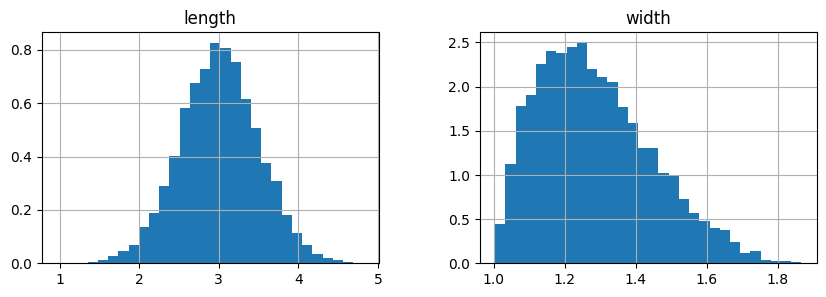

In [ ]:
tr1.hist(bins=30,  density=True, figsize=(10,3));

do these distributions look familiar?

what is the probability of finding a trilobite with length>4?

$\rightarrow$ **observe the power of matrix notation**, try to understand what type of object is generated at each part of the following expressions

In [ ]:
print("%.3f"%np.mean(tr1.length), "%.3f"%np.std(tr1.length))
print("%.3f"%np.mean(tr1.width), "%.3f"%np.std(tr1.width))
print("%.3f"%np.mean(tr1.length>4))

3.008 0.495
1.286 0.160
0.022



we just answered the question above empirically ... we can also answer the question using the gaussian distribution analitically if we consider we have enough evidence to assume the length is distributed normally.

### PDF.  Probability Density Function

- Probability Density function (PDF): calculates the probability of observing a given value.


Specifically, the **PDF** is a function that describes the probability density is distributed along values of $X$  
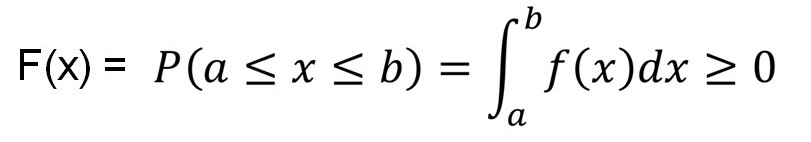

Observe we use the PDF.


In [ ]:
#PDF= Probability density function
import scipy.stats as stats
density_at_4 = stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length)).pdf(4)
print("%.3f" % density_at_4)

0.108


### CDF.  Cumulative distribution function


- Cumulative Density function  (CDF): calculates the probability of an observation equal or less than a value.

- Is the integrate of the PDF

Specifically, the **CDF** is a function that describes the probability that $X$ will take a value less than or equal to $x$ given by: $F_{x}(X) =P(X \leq x)$, defined as $F(x) = \sum_{x_{i} <x} f(x_{i})$. The probability that X lies in the semi-closed interval $\left ( a, b \right ]$, where $a  <  b$, is therefore: $P(a<X\leq b) = F_{x}(b) - F_{x}(a)$

Observe we use the CDF.

In [ ]:
#CDF= cumulative distribution function
import scipy.stats as stats
print("%.3f"%(1-stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length)).cdf(4)))

0.023


Now, we can understand some correlation properties among the variables of my dataset

## <span style="color:orange">student</span>:
Which means the next notation?

In [ ]:
print(tr1[tr1.length<3].width.values)
print(tr1[tr1.length<3].length.values)

[1.0785313  1.37295223 1.26250643 ... 1.24785625 1.2638682  1.48164417]
[2.67375116 2.5941877  2.54838301 ... 2.74109443 2.74992804 2.90588363]


are length and width correlated??

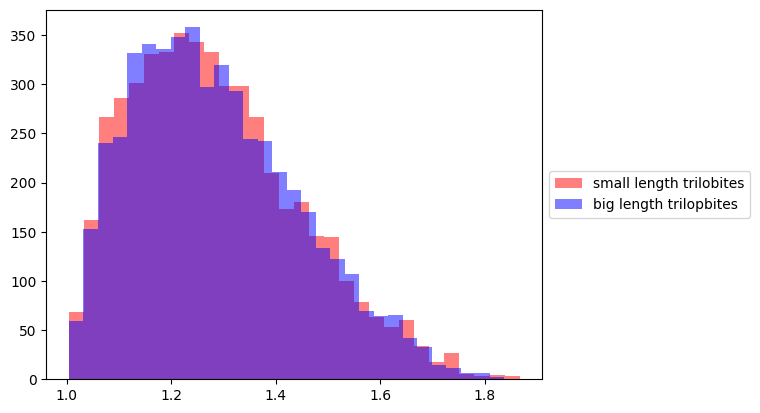

In [ ]:
plt.hist(tr1[tr1.length<3].width.values, bins=30, color="red",  alpha=.5,label="small length trilobites");
plt.hist( tr1[tr1.length>=3].width.values, bins=30, color="blue", alpha=.5, label="big length trilopbites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

In [ ]:
np.corrcoef(tr1.length, tr1.width)

array([[ 1.        , -0.00304669],
       [-0.00304669,  1.        ]])

now we are given a sample from 10000 **african trilobites**

(10000, 2)


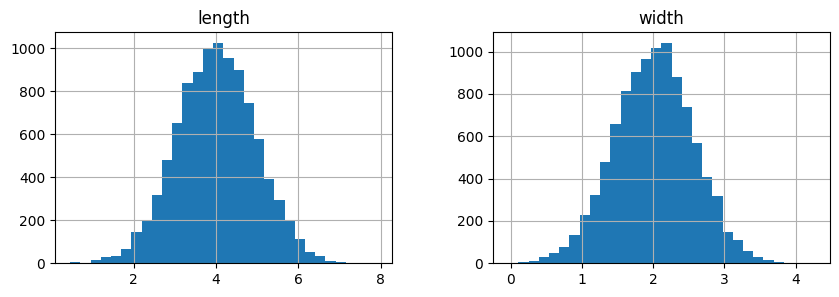

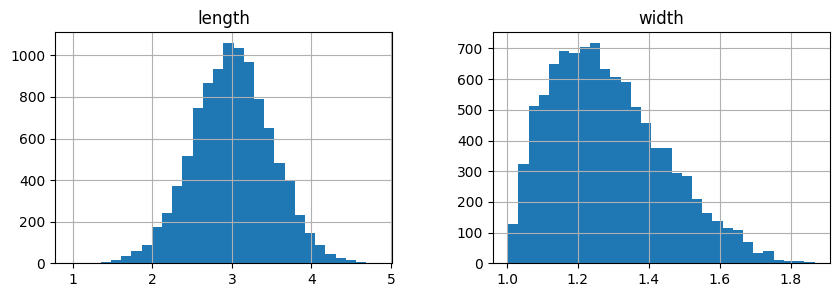

In [ ]:
tr2 = pd.read_csv("data/trilobites2.csv.gz")
print(tr2.shape)
tr2.hist(bins=30, figsize=(10,3));
tr1.hist(bins=30, figsize=(10,3));

and ask the same questions

In [ ]:
print("%.3f"%np.mean(tr2.length), "%.3f"%np.std(tr2.length))
print("%.3f"%np.mean(tr2.width), "%.3f"%np.std(tr2.width))
print("%.3f"%np.mean(tr2.length>4))

4.006 0.960
2.013 0.553
0.504


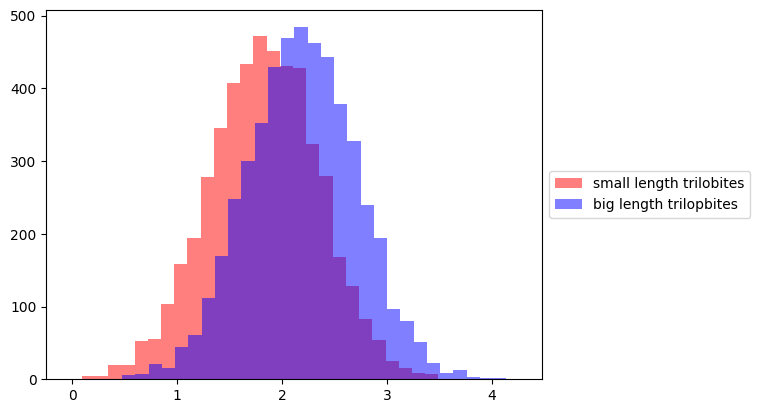

In [ ]:
plt.hist(tr2[tr2.length<4].width.values, bins=30, color="red", alpha=.5, label="small length trilobites");
plt.hist(tr2[tr2.length>=4].width.values, bins=30, color="blue", alpha=.5, label="big length trilopbites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

In [ ]:
np.corrcoef(tr2.length, tr2.width)

array([[1.        , 0.41599215],
       [0.41599215, 1.        ]])

let's compare the populations. observed histograms are _normalized_

Text(0.5, 1.0, 'width')

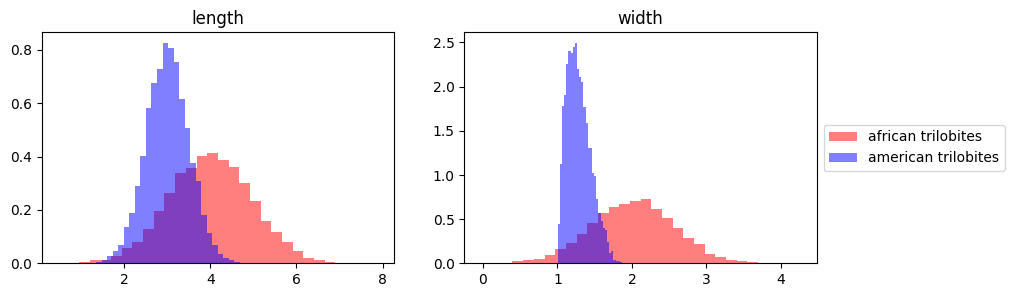

In [ ]:
##This script visualizes the distribution of length and width measurements of trilobites
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(tr2.length.values, bins=30, density=True, color="red", alpha=.5, label="african trilobites")
plt.hist(tr1.length.values, bins=30, density=True, color="blue", alpha=.5, label="american trilobites");
plt.title("length")
plt.subplot(122)
plt.hist(tr2.width.values, bins=30, density=True, color="red", alpha=.5, label="african trilobites")
plt.hist(tr1.width.values, bins=30, density=True, color="blue", alpha=.5, label="american trilobites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))
plt.title("width")

and we can see the correlations more in a more global manner

Text(0, 0.5, 'width')

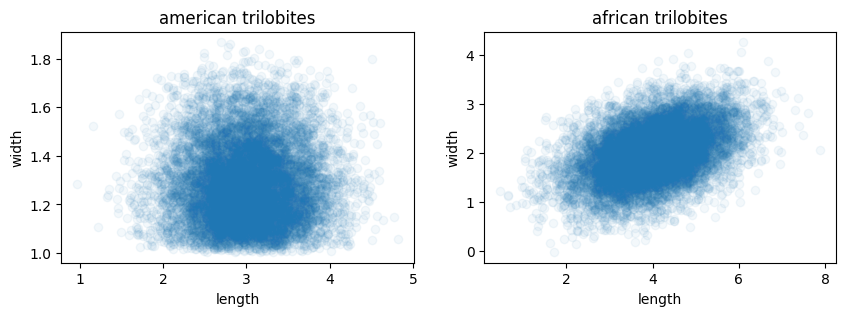

In [ ]:
##This script generates a comparative visualization of trilobite size dimensions (length and width)
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.scatter(tr1.length, tr1.width, alpha=.05)
plt.title("american trilobites")
plt.xlabel("length")
plt.ylabel("width")
plt.subplot(122)
plt.scatter(tr2.length, tr2.width, alpha=.05)
plt.title("african trilobites")
plt.xlabel("length")
plt.ylabel("width")


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/Correlation_examples2.png" style="width:700px;">

# Distributions in Python

Now, we going to study some distributions, using python:

- via `numpy` (mostly for sampling, very fast)
- via `scipy.stats` (pdf, cdf, intervals, etc.)


By using `random numpy`:

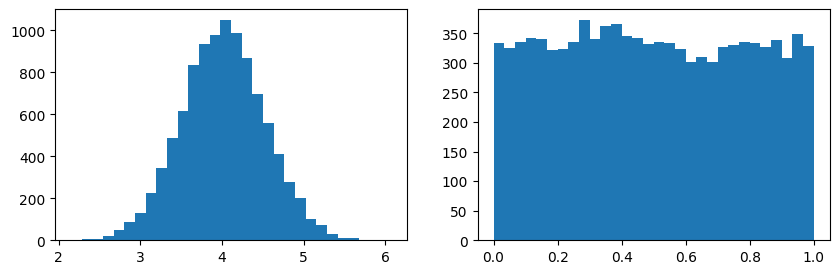

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sample = np.random.normal(loc=4, scale=.5, size=10000)
plt.hist(sample, bins=30);
plt.subplot(122)
sample = np.random.random(size=10000)
plt.hist(sample, bins=30);

By using `stat scipy`:

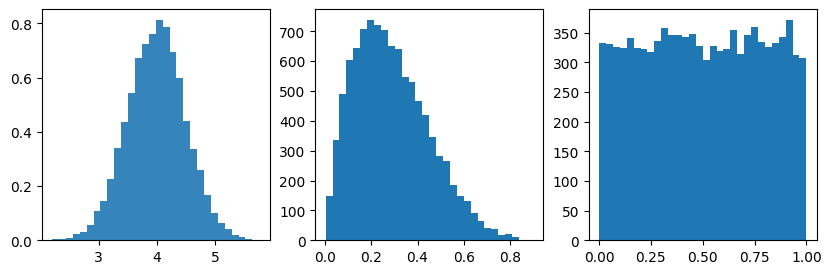

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(131)
d1 = stats.norm(loc=4, scale=.5)
samples = d1.rvs(10000)
plt.hist(samples, bins=30, density=True, alpha=.9);
plt.subplot(132)
d2 = stats.beta(a=2, b=5)
samples = d2.rvs(10000)
plt.hist(samples, bins=30);
plt.subplot(133)
d2 = stats.uniform()
samples = d2.rvs(10000)
plt.hist(samples, bins=30);

Confidence and general distribution function

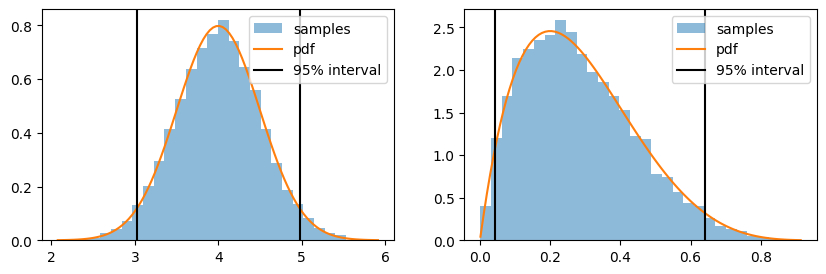

In [ ]:
##This code visualize the normal (Gaussian) distribution and the beta distribution
plt.figure(figsize=(10,3))
plt.subplot(121)
d1 = stats.norm(loc=4, scale=.5)
samples = d1.rvs(10000)
plt.hist(samples, bins=30, density=True, alpha=.5, label="samples");
t = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(t, d1.pdf(t), label="pdf")
#Confidence interval with equal areas around the median.
interval = d1.interval(.95)
#Add a vertical line across the axes.
plt.axvline(interval[0], color="black", label="95% interval")
plt.axvline(interval[1], color="black")
plt.legend()

plt.subplot(122)
d2 = stats.beta(a=2, b=5)
samples = d2.rvs(10000)
plt.hist(samples, bins=30, density=True, alpha=.5, label="samples");
t = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(t, d2.pdf(t), label="pdf")
interval = d2.interval(.95)
plt.axvline(interval[0], color="black", label="95% interval")
plt.axvline(interval[1], color="black")
plt.legend()

comparing execution times for sampling

In [ ]:
%timeit np.random.normal(10000)

The slowest run took 5.01 times longer than the fastest. This could mean that an intermediate result is being cached.
2.64 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%timeit d1.rvs(10000)

358 µs ± 6.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Classification applications

## <span style="color:orange">student</span>:

Suppose that we have found a set of new trilobites with different lengths. For instance lenghts of 2, 3 and 4.

**which class (african or american) do you think they belong to? with what probability?**


In [ ]:
gaussian1 = stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length))
gaussian2 = stats.norm(loc=np.mean(tr2.length), scale=np.std(tr2.length))
print("%.3f"%gaussian1.pdf(2))
print("%.3f"%gaussian2.pdf(2))
print( "--")
print( "%.3f"%gaussian1.pdf(3))
print( "%.3f"%gaussian2.pdf(3))
print( "--")
print( "%.3f"%gaussian1.pdf(4))
print( "%.3f"%gaussian2.pdf(4))


# Law of Large Numbers

Law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of identically distributed, randomly generated experiments. According to the LLN, as the number of trials or samples increases, the average of the results obtained from these trials will converge to the expected value (or mean) of the population.


$$\bar{X}_n \to \mu \text{ for } n \to \infty$$


1. Take a sample of size 2,3,4,...,1000 from any distritbution
2. Compute the **sample mean** for each sample size
3. Plot the **sample means** and compare them with the actual population mean
4. Repeat 2 times

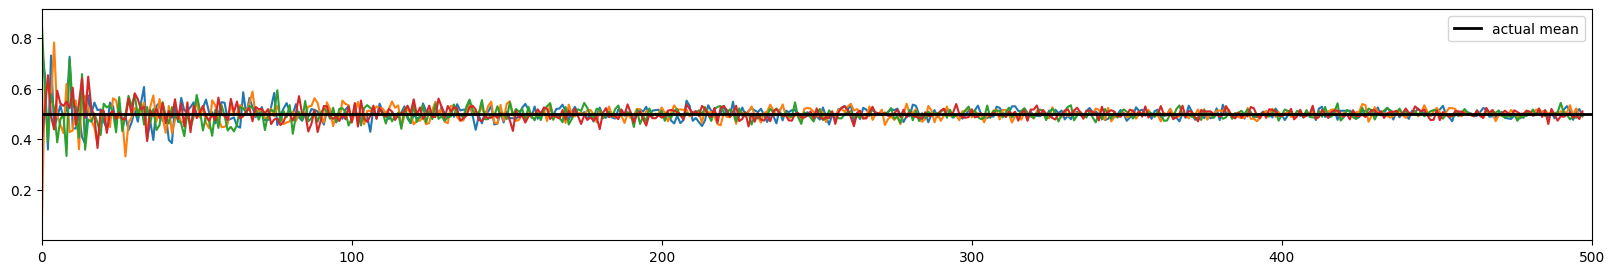

In [ ]:
#aims to illustrate the Law of Large Numbers (LLN)
plt.figure(figsize=(20,3))
for i in range(1, 5):
    sample_means= [np.mean(np.random.uniform(size=N)) for N in range(2,500)]
    plt.plot(sample_means)#, label="run %d"%i)

plt.axhline(0.5, label="actual mean", color="black", lw=2)
plt.xlim(0,500)
plt.legend()



"The average of the results obtained from a large number of trials should be close to the **expected value**, and will tend to become closer as more trials are performed."[Wiki]

# Central Limit Theorem

The probability distribution of the mean of i.i.d random variables with finite variance is close to a **normal distribution** the the population size increase.

A summary to proof central limit theorem is:

1. Take a sample of size N=2 from any distribution
2. Compute the **sample mean**
3. Repeat 100 times

4. Plot the distribution of the **sample mean**
5. Repeat for N=4,10,30

**Agregations of i.i.d. random variables are distributed as a Gaussian**:

$$\frac{X_1 + X_2 + ... + X_N}{N} \sim \mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$$

**i.i.d** if each random variable has the same distribution and all of them are mutually independent.

The central limit theorem allows us use statistics of samples without know about particular shape distribution of the population.

0 2
1 3
2 10
3 20


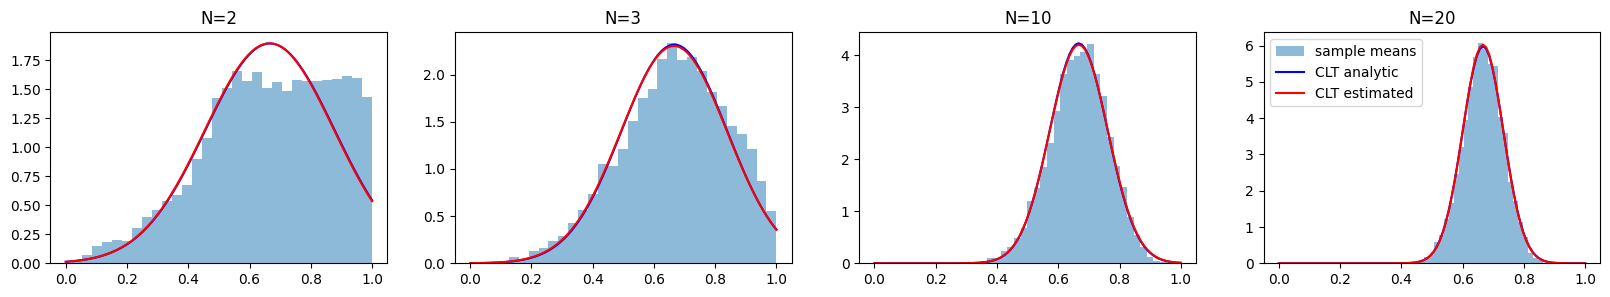

In [ ]:
#practical illustration of the Central Limit Theorem (CLT) using a Beta distribution as the parent distribution
plt.figure(figsize=(20,3))

a,b = 1.,.5
distrib = stats.beta(a=a,b=b)
d_mean = a/(a+b)
d_std  = np.sqrt(a*b/((a+b+1)*(a+b)**2))


for i,N in enumerate([2,3,10,20]):
    print( i, N)
    sample_means = []
    # _ is a traditional name for "don't care"
    for _ in range(10000):
        sample_of_size_N = distrib.rvs(N)
        sample_means.append(np.mean(sample_of_size_N))
    plt.subplot(1,4,i+1)
    x = np.linspace(0,1,100)
    plt.hist(sample_means, bins=30, density=True, alpha=.5, label="sample means");
    ref = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
    plt.plot(x, ref.pdf(x), label="CLT analytic", color="blue")
    ref = stats.norm(loc=np.mean(sample_means), scale=np.std(sample_means))
    plt.plot(x, ref.pdf(x), label="CLT estimated", color="red")
    plt.title("N=%d"%N)
plt.legend()

As you see as we approach bigger values we get more accurate results

## <span style="color:orange">student</span>:

Test the central limit theorem by using other distribution as input, for instance the uniform and the Poisson distribution.


# Testing hypothesis

It is a procedure to stablish if a property of a statistical population is compatible with the observed in a sample of the population, ***i.e.***,  it is confirmatory data analysis.

In average student's grades in a course is 3.9 and its standard deviation is 0.76. This semester, my class of 20 students had an average of 3.5:

- Has something gone wrong this semester?
- Is it just a statistical fluctuation?

**Reformulate the question**: If nothing went wrong, how likely is it to obtain a sample of 20 students having an average of 3.5?

If it is very unlikely (say <5% probability), then we have evidence to think that this **IS NOT** a random fluctuation.

**Empirically:** Let's answer by brute force.

1. Assume grades follow some distribution with mean 3.9
2. Take a sample of size 20 an compute the **sample mean**
3. Repeat 10000 times step 2
4. Plot the histogram of the **sample means**
5. Is 3.5 within a 95% confidence interval?

**Analytically:** We can also answer with CLT

1. Build a Gaussian distribution with mean and std as described above
2. Compute 95% confidence intervals

3.914825497425025
P-value
empirical  prob <3.5 = 0.001
analytical prob <3.5 = 0.000


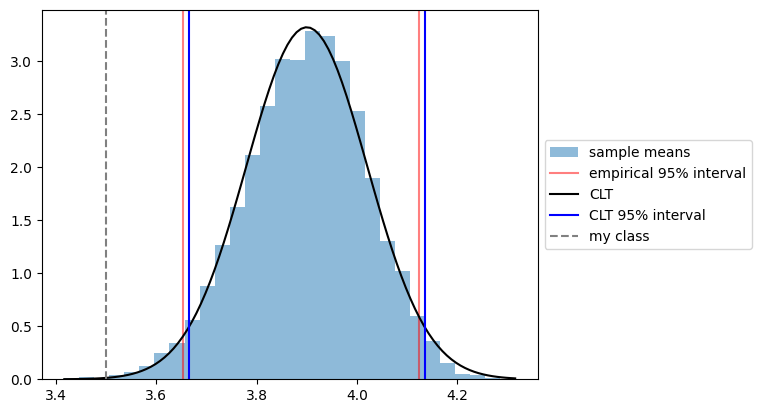

In [ ]:
def ht(N):
    # first by brute force
    d = stats.beta(5, 1.41)
    print(np.mean(d.rvs(size=N)*5))
    sample_means = np.r_[[np.mean(d.rvs(size=N)*5) for _ in range(10000)]]
    print ("P-value")
    print ("=======")
    print ("empirical  prob <3.5 = %.3f"%np.mean(sample_means<3.5))
    plt.hist(sample_means, bins=30, alpha=.5, density=True, label="sample means");
    empirical_interval = np.percentile(sample_means, [2.5, 97.5])
    plt.axvline(empirical_interval[0], color="red",  alpha=.5)
    plt.axvline(empirical_interval[1], color="red",  alpha=.5, label="empirical 95% interval")

    # now analytical
    t = np.linspace(np.min(sample_means), np.max(sample_means), 100)
    ref = stats.norm(loc=3.9, scale=0.76/np.sqrt(N))
    plt.plot(t, ref.pdf(t), label="CLT", color="black")

    interval = ref.interval(.95)
    plt.axvline(interval[0], color="blue", label="CLT 95% interval")
    plt.axvline(interval[1], color="blue")

    plt.axvline(3.5, color="gray", ls="--", label="my class")
    plt.legend(loc="center left", bbox_to_anchor=(1,.5))

    print("analytical prob <3.5 = %.3f"%ref.cdf(3.5))

ht(40)

observe what happens if our class was smaller or larger.

- smaller samples: confidence interval grows, distribution still not converged to normal (CLT needs larger samples)
- larger samples: confidence interval shrinks and CLT works good

4.1736653610031285
P-value
empirical  prob <3.5 = 0.127
analytical prob <3.5 = 0.120


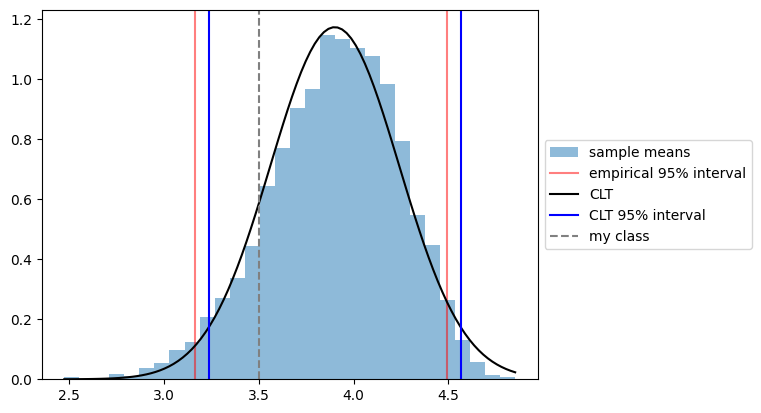

In [ ]:
ht(5)

3.9566908742759694
P-value
empirical  prob <3.5 = 0.001
analytical prob <3.5 = 0.000


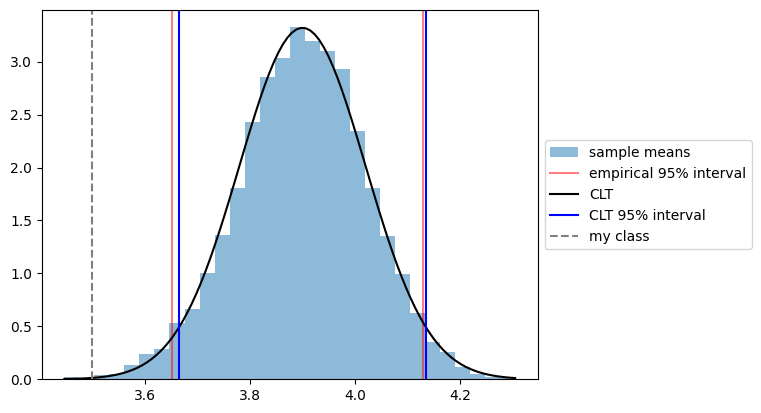

In [ ]:
ht(40)

## References

[1] statistic in plain english (book)

[2] Reference scipy: https://docs.scipy.org/doc/scipy/reference/index.html

[3] Some distributions in scipy: http://cmdlinetips.com/2018/03/probability-distributions-in-python/

[4] Statistical distributions: a summary: http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

[5] Probability concepts explained: Introduction: https://towardsdatascience.com/probability-concepts-explained-introduction-a7c0316de465


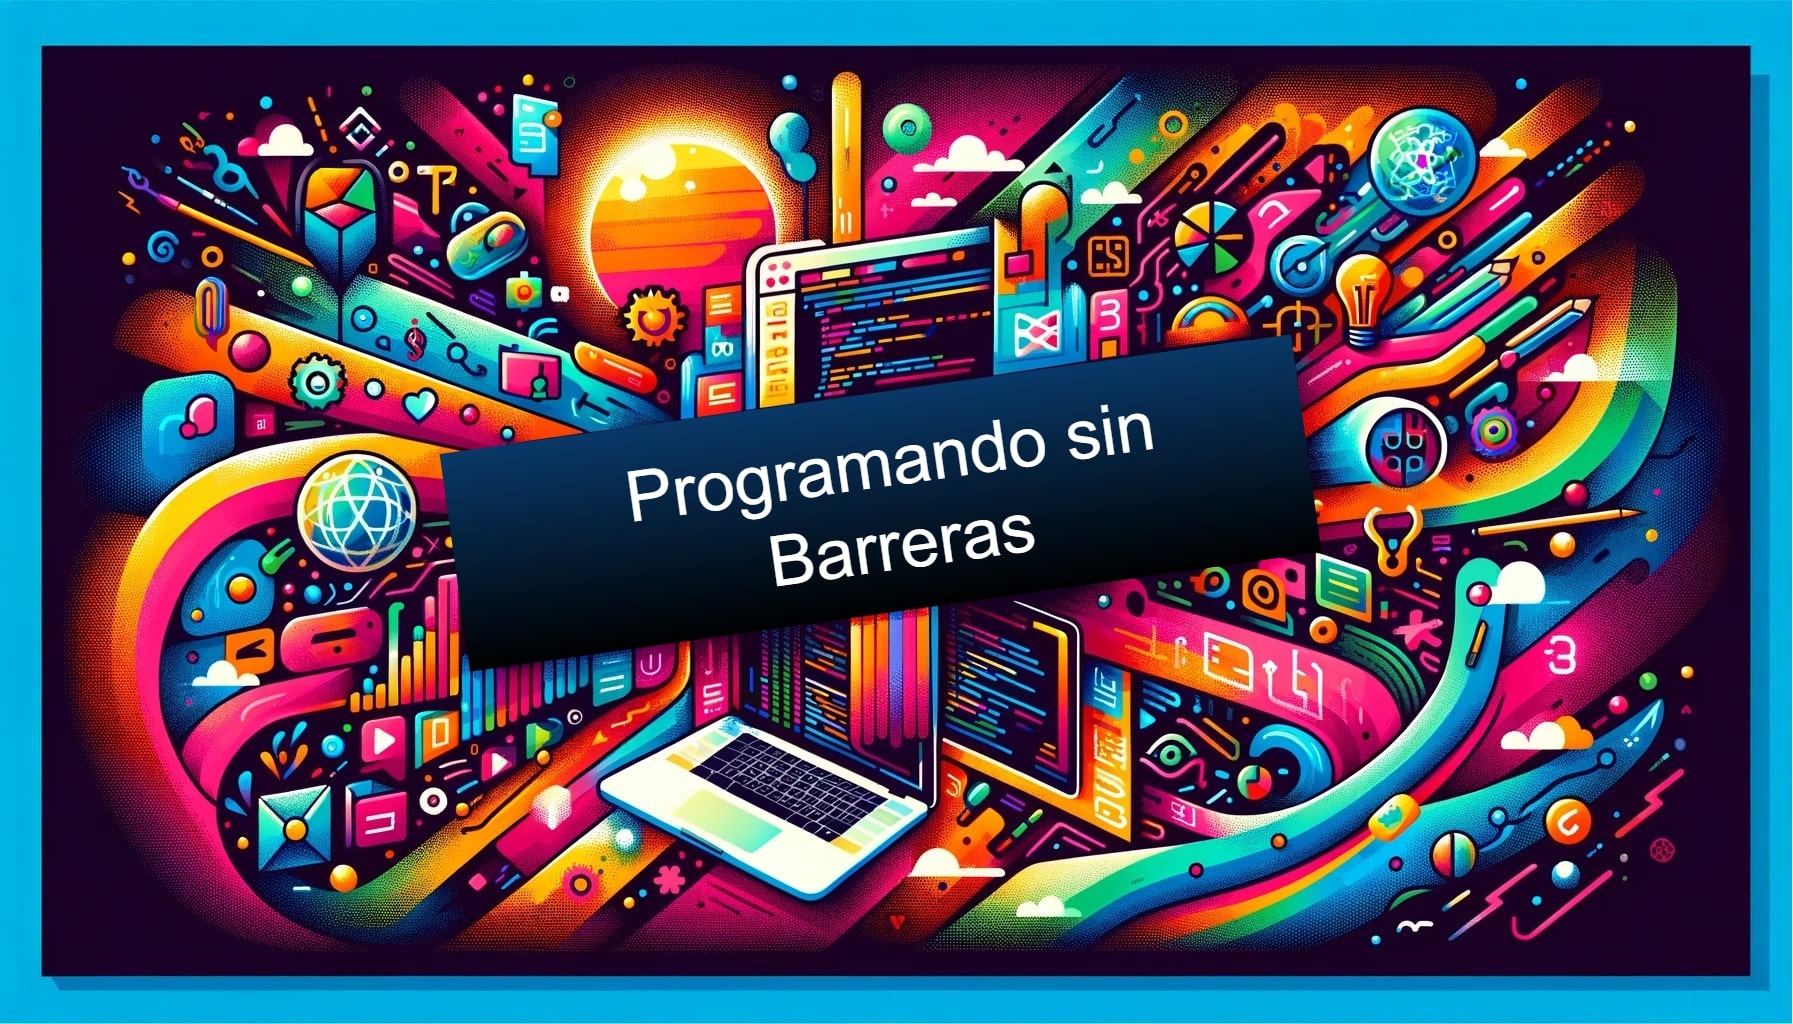